In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# IMPORTING OF DATASET

In [85]:
df = pd.read_csv("Mental Health Dataset.csv")
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [86]:
print(df['treatment'].value_counts())
print(df['treatment'].value_counts(normalize=True) * 100)  # in %


Yes    147606
No     144758
Name: treatment, dtype: int64
Yes    50.487064
No     49.512936
Name: treatment, dtype: float64


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [88]:
df.shape, df.columns.tolist()

((292364, 17),
 ['Timestamp',
  'Gender',
  'Country',
  'Occupation',
  'self_employed',
  'family_history',
  'treatment',
  'Days_Indoors',
  'Growing_Stress',
  'Changes_Habits',
  'Mental_Health_History',
  'Mood_Swings',
  'Coping_Struggles',
  'Work_Interest',
  'Social_Weakness',
  'mental_health_interview',
  'care_options'])

In [89]:
df.describe(include='object').T

,count,unique,top,freq
Timestamp,292364,580,8/27/2014 11:43,2384
Gender,292364,2,Male,239850
Country,292364,35,United States,171308
Occupation,292364,5,Housewife,66351
self_employed,287162,2,No,257994
family_history,292364,2,No,176832
treatment,292364,2,Yes,147606
Days_Indoors,292364,5,1-14 days,63548
Growing_Stress,292364,3,Maybe,99985
Changes_Habits,292364,3,Yes,109523


In [90]:
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

<Axes: >

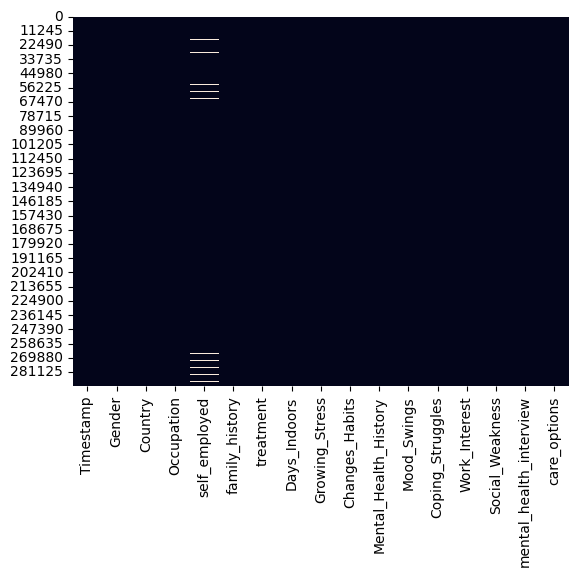

In [91]:
sb.heatmap(df.isnull(), cbar=False)

In [92]:
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)

In [93]:
df.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [94]:
df.duplicated().sum()

2313

In [95]:
print("Total duplicates:", df.duplicated().sum())
df[df.duplicated()].head()
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

Total duplicates: 2313
Shape after dropping duplicates: (290051, 17)


In [96]:
df.duplicated().sum()

0

In [97]:
df.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [98]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [99]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique()[:10])  # show first 10 unique categories
    print("-" * 40)

Timestamp: 580 unique values
['8/27/2014 11:29' '8/27/2014 11:31' '8/27/2014 11:32' '8/27/2014 11:37'
 '8/27/2014 11:43' '8/27/2014 11:49' '8/27/2014 11:51' '8/27/2014 11:52'
 '8/27/2014 12:18' '8/27/2014 12:37']
----------------------------------------
Gender: 2 unique values
['female' 'male']
----------------------------------------
Country: 35 unique values
['united states' 'poland' 'australia' 'canada' 'united kingdom'
 'south africa' 'sweden' 'new zealand' 'netherlands' 'india']
----------------------------------------
Occupation: 5 unique values
['corporate' 'student' 'business' 'housewife' 'others']
----------------------------------------
self_employed: 2 unique values
['no' 'yes']
----------------------------------------
family_history: 2 unique values
['no' 'yes']
----------------------------------------
treatment: 2 unique values
['yes' 'no']
----------------------------------------
Days_Indoors: 5 unique values
['1-14 days' 'go out every day' 'more than 2 months' '15-30 day

In [100]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce', infer_datetime_format=True)
print(df['Timestamp'].isna().sum())

0


In [101]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.day_name()
df['Hour'] = df['Timestamp'].dt.hour

In [102]:
print(df[['Timestamp', 'Year', 'Month', 'Weekday', 'Hour']].head(10))

            Timestamp  Year  Month    Weekday  Hour
0 2014-08-27 11:29:00  2014      8  Wednesday    11
1 2014-08-27 11:31:00  2014      8  Wednesday    11
2 2014-08-27 11:32:00  2014      8  Wednesday    11
3 2014-08-27 11:37:00  2014      8  Wednesday    11
4 2014-08-27 11:43:00  2014      8  Wednesday    11
5 2014-08-27 11:49:00  2014      8  Wednesday    11
6 2014-08-27 11:51:00  2014      8  Wednesday    11
7 2014-08-27 11:52:00  2014      8  Wednesday    11
8 2014-08-27 12:18:00  2014      8  Wednesday    12
9 2014-08-27 12:37:00  2014      8  Wednesday    12


# DATA VISULISATION

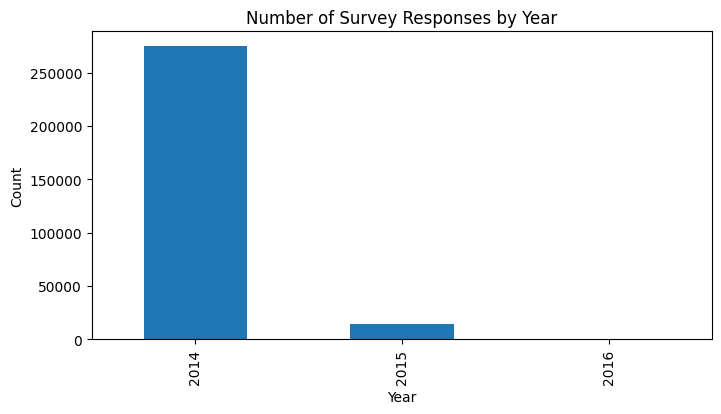

In [103]:
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title("Number of Survey Responses by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

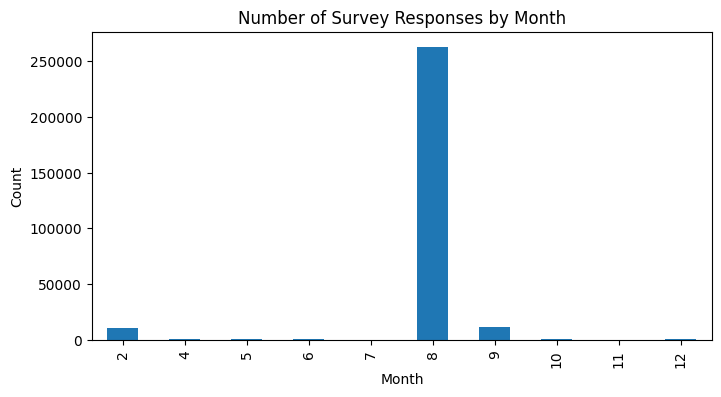

In [104]:
df['Month'].value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title("Number of Survey Responses by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

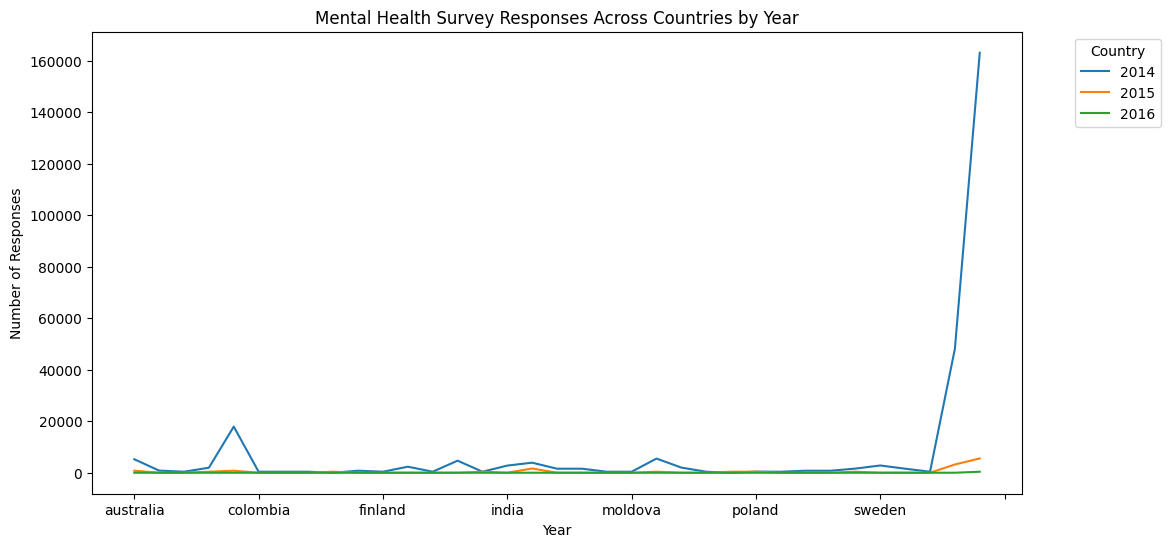

In [105]:
country_trends = df.groupby(['Country', 'Year']).size().unstack(fill_value=0)
country_trends.plot(kind='line', figsize=(12,6))
plt.title("Mental Health Survey Responses Across Countries by Year")
plt.xlabel("Year")
plt.ylabel("Number of Responses")
plt.legend(title="Country", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

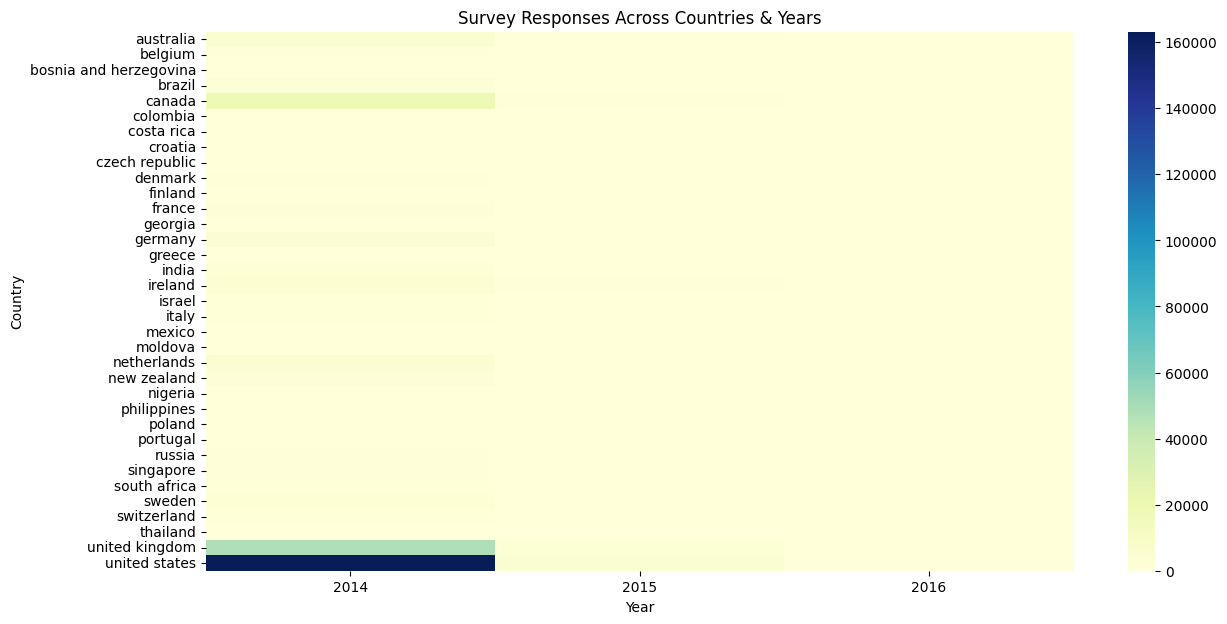

In [106]:
plt.figure(figsize=(14,7))
sb.heatmap(country_trends, cmap="YlGnBu", cbar=True)
plt.title("Survey Responses Across Countries & Years")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


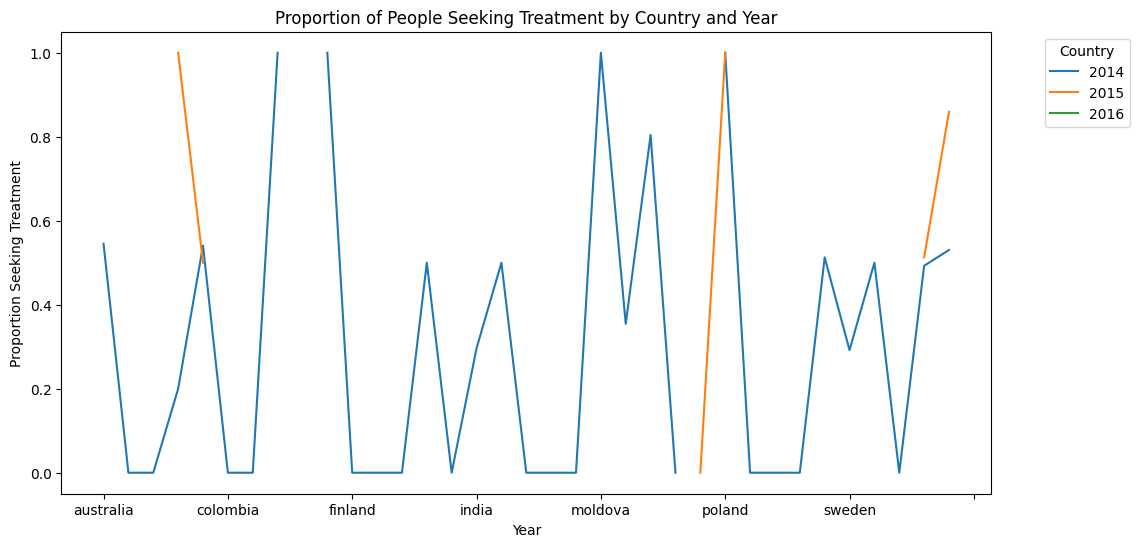

In [107]:
treatment_trends = (
    df.groupby(['Country','Year'])['treatment']
      .value_counts(normalize=True)   # proportion yes/no
      .unstack()
      .fillna(0)
)

treatment_trends_yes = treatment_trends['yes'].unstack()
treatment_trends_yes.plot(figsize=(12,6))
plt.title("Proportion of People Seeking Treatment by Country and Year")
plt.xlabel("Year")
plt.ylabel("Proportion Seeking Treatment")
plt.legend(title="Country", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


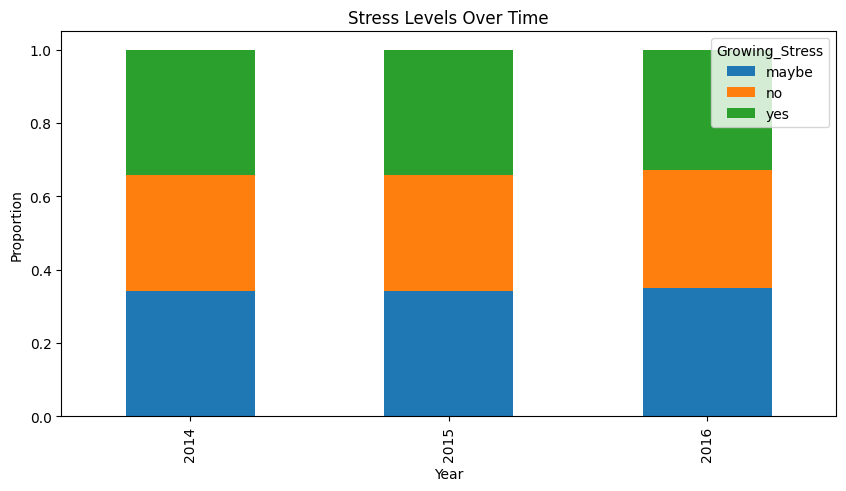

In [108]:
stress_trend = (
    df.groupby('Year')['Growing_Stress']
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)
)

stress_trend.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Stress Levels Over Time")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.show()


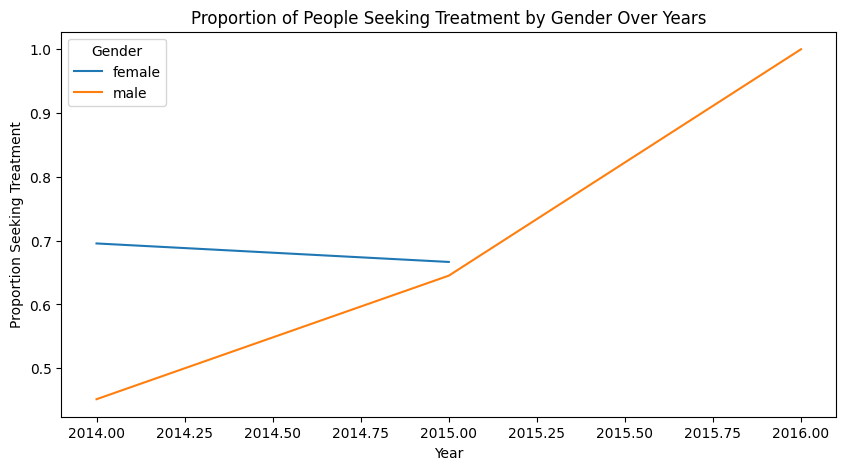

In [109]:
gender_country_trends = (
    df.groupby(['Year','Gender'])['treatment']
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)
      .reset_index()
)

plt.figure(figsize=(10,5))
sb.lineplot(data=gender_country_trends, x="Year", y="yes", hue="Gender")
plt.title("Proportion of People Seeking Treatment by Gender Over Years")
plt.ylabel("Proportion Seeking Treatment")
plt.show()


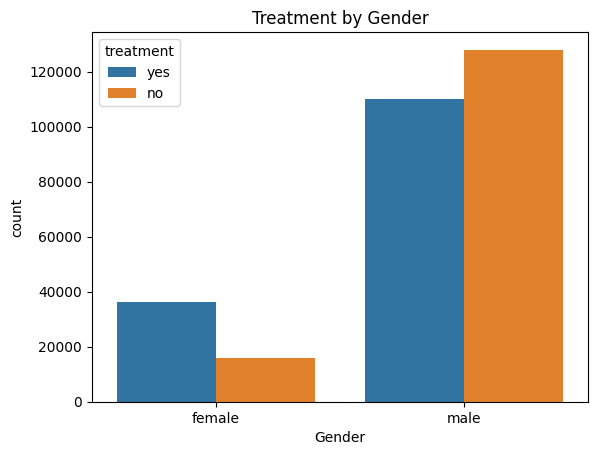

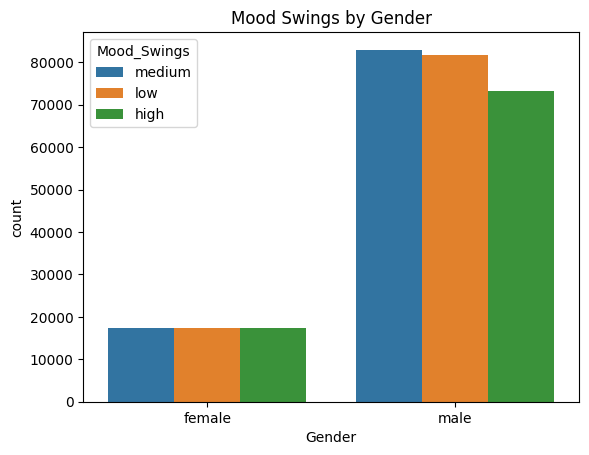

In [110]:
sb.countplot(data=df, x='Gender', hue='treatment')
plt.title("Treatment by Gender")
plt.show()

sb.countplot(data=df, x='Gender', hue='Mood_Swings')
plt.title("Mood Swings by Gender")
plt.show()


In [111]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [112]:
df['Gender'] = df['Gender'].replace({
    'male':'male', 'm':'male', 'man':'male',
    'female':'female', 'f':'female', 'woman':'female'
})
df.loc[~df['Gender'].isin(['male','female']), 'Gender'] = 'other'


In [113]:
country_counts = df['Country'].value_counts()
rare_countries = country_counts[country_counts < 100].index
df['Country'] = df['Country'].replace(rare_countries, 'Other')


In [114]:
print(df.isnull().sum())

Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
Year                       0
Month                      0
Weekday                    0
Hour                       0
dtype: int64


In [115]:
df['care_options'].fillna(df['care_options'].mode()[0], inplace=True)

In [116]:
print(df.isnull().sum())

Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
Year                       0
Month                      0
Weekday                    0
Hour                       0
dtype: int64


In [117]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


In [118]:
print(df.isin(['na','n/a','none']).sum())


Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
Year                       0
Month                      0
Weekday                    0
Hour                       0
dtype: int64


In [119]:
df.head(10)

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Year,Month,Weekday,Hour
0,female,united states,corporate,no,no,yes,1-14 days,yes,no,yes,medium,no,no,yes,no,not sure,2014,8,Wednesday,11
1,female,united states,corporate,no,yes,yes,1-14 days,yes,no,yes,medium,no,no,yes,no,no,2014,8,Wednesday,11
2,female,united states,corporate,no,yes,yes,1-14 days,yes,no,yes,medium,no,no,yes,no,yes,2014,8,Wednesday,11
3,female,united states,corporate,no,yes,yes,1-14 days,yes,no,yes,medium,no,no,yes,maybe,yes,2014,8,Wednesday,11
4,female,united states,corporate,no,yes,yes,1-14 days,yes,no,yes,medium,no,no,yes,no,yes,2014,8,Wednesday,11
5,female,poland,corporate,no,no,yes,1-14 days,yes,no,yes,medium,no,no,yes,maybe,not sure,2014,8,Wednesday,11
6,female,australia,corporate,no,yes,yes,1-14 days,yes,no,yes,medium,no,no,yes,no,not sure,2014,8,Wednesday,11
7,female,united states,corporate,no,no,no,1-14 days,yes,no,yes,medium,no,no,yes,no,no,2014,8,Wednesday,11
8,female,united states,corporate,no,no,no,1-14 days,yes,no,yes,medium,no,no,yes,no,not sure,2014,8,Wednesday,12
9,female,united states,corporate,no,no,no,1-14 days,yes,no,yes,medium,no,no,yes,no,no,2014,8,Wednesday,12


In [120]:
binary_cols = ['treatment']

for col in binary_cols:
    df[col] = df[col].map({'yes':1, 'no':0})

In [121]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", num_cols)

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", cat_cols)


Numerical Columns: ['treatment', 'Year', 'Month', 'Hour']
Categorical Columns: ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options', 'Weekday']


In [122]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 50)


Column: Gender
['female' 'male']
--------------------------------------------------
Column: Country
['united states' 'poland' 'australia' 'canada' 'united kingdom'
 'south africa' 'sweden' 'new zealand' 'netherlands' 'india' 'belgium'
 'ireland' 'france' 'portugal' 'brazil' 'costa rica' 'russia' 'germany'
 'switzerland' 'finland' 'israel' 'italy' 'bosnia and herzegovina'
 'singapore' 'nigeria' 'croatia' 'thailand' 'denmark' 'mexico' 'greece'
 'moldova' 'colombia' 'georgia' 'czech republic' 'philippines']
--------------------------------------------------
Column: Occupation
['corporate' 'student' 'business' 'housewife' 'others']
--------------------------------------------------
Column: self_employed
['no' 'yes']
--------------------------------------------------
Column: family_history
['no' 'yes']
--------------------------------------------------
Column: treatment
[1 0]
--------------------------------------------------
Column: Days_Indoors
['1-14 days' 'go out every day' 'more than 2

In [123]:
X = df.drop('treatment', axis=1)
y = df['treatment']


In [124]:
import pandas as pd
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)


1    146184
0    143867
Name: treatment, dtype: int64
1    50.399413
0    49.600587
Name: treatment, dtype: float64


In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [126]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((232040, 19), (58011, 19), (232040,), (58011,))

In [127]:
# Find categorical (non-numeric) columns
cat_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols.tolist())


Categorical columns: ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options', 'Weekday']


# FEATURE ENGINEERING (ENCODING, MAPPING AND SCALING)

In [128]:
weekday_map = {
    "Monday": 0, "Tuesday": 1, "Wednesday": 2,
    "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6
}

for data in [X_train, X_test]:
    data['Weekday'] = data['Weekday'].map(weekday_map)
    data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
    data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)
    data['Weekday_sin'] = np.sin(2 * np.pi * data['Weekday'] / 7)
    data['Weekday_cos'] = np.cos(2 * np.pi * data['Weekday'] / 7)

In [129]:
# Find categorical (non-numeric) columns
cat_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols.tolist())


Categorical columns: ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']


In [130]:
mood_order = [['low', 'medium', 'high']]
days_order = [['go out every day', '1-14 days', '15-30 days', '31-60 days', 'more than 2 months']]

from sklearn.preprocessing import OrdinalEncoder
mood_encoder = OrdinalEncoder(categories=mood_order)
days_encoder = OrdinalEncoder(categories=days_order)

X_train[['Mood_Swings']] = mood_encoder.fit_transform(X_train[['Mood_Swings']])
X_test[['Mood_Swings']] = mood_encoder.transform(X_test[['Mood_Swings']])

X_train[['Days_Indoors']] = days_encoder.fit_transform(X_train[['Days_Indoors']])
X_test[['Days_Indoors']] = days_encoder.transform(X_test[['Days_Indoors']])

In [131]:
binary_map = {'yes': 1, 'no': 0, 'maybe': 2}
binary_cols = ['Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Social_Weakness']

for data in [X_train, X_test]:
    for col in binary_cols:
        data[col] = data[col].map(binary_map)

In [132]:
one_hot_cols = ['Gender', 'Country', 'Occupation', 'Work_Interest', 'mental_health_interview']
X_train = pd.get_dummies(X_train, columns=one_hot_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=one_hot_cols, drop_first=True)

# Align columns to avoid missing dummy mismatch
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [133]:
# Find categorical (non-numeric) columns
cat_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols.tolist())


Categorical columns: ['self_employed', 'family_history', 'Coping_Struggles', 'care_options']


In [134]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Step 1: Define categorical columns
cat_cols = ['self_employed', 'family_history', 'Coping_Struggles', 'care_options']

# Step 2: Create ColumnTransformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

# Step 3: Fit-transform train and transform test
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Step 4: Convert back to DataFrame
encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
num_cols = [c for c in X_train.columns if c not in cat_cols]
all_cols = list(encoded_cols) + num_cols

X_train_encoded = pd.DataFrame(X_train_encoded, columns=all_cols)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=all_cols)

# Step 5: Now apply StandardScaler on the encoded data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns=X_train_encoded.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_encoded), columns=X_train_encoded.columns)

print("Preprocessing complete.")
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Preprocessing complete.
Train shape: (232040, 62)
Test shape: (58011, 62)


In [135]:
X_train_scaled.to_csv("final_preprocessed_features.csv", index=False)
print("Exported final features to final_preprocessed_features.csv")


Exported final features to final_preprocessed_features.csv


# LOGISTIC AND RANDOM FOREST BEFORE HYPERPARAMETER TUNING 

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))



Logistic Regression Results
Accuracy: 0.7203461412490735
AUC-ROC: 0.7944198784498264
              precision    recall  f1-score   support

           0       0.72      0.71      0.71     28774
           1       0.72      0.73      0.73     29237

    accuracy                           0.72     58011
   macro avg       0.72      0.72      0.72     58011
weighted avg       0.72      0.72      0.72     58011


Random Forest Results
Accuracy: 0.8481839651100653
AUC-ROC: 0.9252617138896416
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     28774
           1       0.85      0.84      0.85     29237

    accuracy                           0.85     58011
   macro avg       0.85      0.85      0.85     58011
weighted avg       0.85      0.85      0.85     58011



# LOGISTIC AND RANDOM FOREST AFTER HYPERPARAMETER TUNING

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42, penalty='l2', l1_ratio=0.25, class_weight='balanced', C=0.046415888336127795)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100, min_samples_split=5, min_samples_leaf=4, 
                            max_features='sqrt', max_depth=None, bootstrap=True)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))


C:\Users\aarav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(



Logistic Regression Results
Accuracy: 0.7206909034493458
AUC-ROC: 0.7945506576249006
              precision    recall  f1-score   support

           0       0.72      0.71      0.72     28774
           1       0.72      0.73      0.73     29237

    accuracy                           0.72     58011
   macro avg       0.72      0.72      0.72     58011
weighted avg       0.72      0.72      0.72     58011


Random Forest Results
Accuracy: 0.8849183775490855
AUC-ROC: 0.9618586220821305
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     28774
           1       0.88      0.89      0.89     29237

    accuracy                           0.88     58011
   macro avg       0.89      0.88      0.88     58011
weighted avg       0.88      0.88      0.88     58011



# KNN, XGB, LGB AND CATBOOST BEFORE HYPERPARAMETER TUNING 

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

models = {
    "XGBoost": XGBClassifier(
        n_estimators=200, learning_rate=np.float64(0.22749999999999998), max_depth=7,
        subsample=0.9, colsample_bytree=0.8, random_state=42, gamma = 0.1,
        use_label_encoder=False, eval_metric="logloss",min_child_weight = 3
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=-1,
        subsample=0.9, colsample_bytree=0.8, random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=300, learning_rate=0.1, depth=6,
        verbose=0, random_state=42
    ),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Probability scores for AUC (if available)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = y_pred

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    results[name] = {"Accuracy": acc, "AUC": auc}

    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} AUC-ROC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

# Final Comparison
print("\n Advanced Models Comparison:")
for name, scores in results.items():
    print(f"{name}: Accuracy={scores['Accuracy']:.4f}, AUC={scores['AUC']:.4f}")



🔹 Training XGBoost...


C:\Users\aarav\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9163
XGBoost AUC-ROC: 0.9857
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     28774
           1       0.92      0.92      0.92     29237

    accuracy                           0.92     58011
   macro avg       0.92      0.92      0.92     58011
weighted avg       0.92      0.92      0.92     58011


🔹 Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 116947, number of negative: 115093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 232040, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503995 -> initscore=0.015980
[LightGBM] [Inf

# KNN, XGB, LGB AND CATBOOST AFTER HYPERPARAMETER TUNING 

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


models = {
    "XGBoost": XGBClassifier(
        n_estimators=300, learning_rate=np.float64(0.25), max_depth=6,
        subsample=1.0, colsample_bytree=0.8, random_state=42, gamma = 0.3,
        use_label_encoder=False, eval_metric="logloss",min_child_weight = 2
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=200, learning_rate=np.float64(0.1), max_depth=12,
        subsample=1.0, colsample_bytree=0.9, random_state=42, reg_alpha=0.5,
        reg_lambda=0, num_leaves=63
    ),
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=np.float64(0.075), depth=6,
        verbose=0, random_state=42, border_count=128
    ),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Probability scores for AUC (if available)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = y_pred

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    results[name] = {"Accuracy": acc, "AUC": auc}

    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} AUC-ROC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

# Final Comparison
print("\n Advanced Models Comparison:")
for name, scores in results.items():
    print(f"{name}: Accuracy={scores['Accuracy']:.4f}, AUC={scores['AUC']:.4f}")



🔹 Training XGBoost...


C:\Users\aarav\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:45:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9211
XGBoost AUC-ROC: 0.9859
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     28774
           1       0.93      0.92      0.92     29237

    accuracy                           0.92     58011
   macro avg       0.92      0.92      0.92     58011
weighted avg       0.92      0.92      0.92     58011


🔹 Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 116947, number of negative: 115093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 232040, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503995 -> initscore=0.015980
[LightGBM] [Inf

In [140]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Define base models (replace with your tuned hyperparameters)
rf_best = RandomForestClassifier(
    n_estimators=100, max_depth=20, random_state=42, min_samples_leaf=2, min_samples_split=2

)
lgb_best = LGBMClassifier(
    n_estimators=200, learning_rate=np.float64(0.1), max_depth=12,
        subsample=1.0, colsample_bytree=0.9, random_state=42, reg_alpha=0.5,
        reg_lambda=0, num_leaves=63
)

cat_best = CatBoostClassifier(
    iterations=500, learning_rate=np.float64(0.075), depth=6,
        verbose=0, random_state=42, border_count=128
)

# Create Stacking Classifier
stack_model = StackingClassifier(
    estimators=[("rf", rf_best), ("lgb", lgb_best), ("cat", cat_best)],
    final_estimator=LogisticRegression(max_iter=1000),  # meta-learner
    cv=3,
    n_jobs=-1,
    passthrough=False
)

print(" Training Stacking Model...")
stack_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_stack = stack_model.predict(X_test_scaled)
y_pred_prob_stack = stack_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
acc = accuracy_score(y_test, y_pred_stack)
auc = roc_auc_score(y_test, y_pred_prob_stack)

print("\n Ensemble Stacking Results")
print("Accuracy:", acc)
print("AUC-ROC:", auc)
print(classification_report(y_test, y_pred_stack))


 Training Stacking Model...

 Ensemble Stacking Results
Accuracy: 0.9290651772939615
AUC-ROC: 0.9875982911828597
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     28774
           1       0.93      0.93      0.93     29237

    accuracy                           0.93     58011
   macro avg       0.93      0.93      0.93     58011
weighted avg       0.93      0.93      0.93     58011



In [141]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier  # <-- important

# Base models (with tuned params)
rf_best = RandomForestClassifier(
    n_estimators=100, max_depth=20, random_state=42, min_samples_leaf=2, min_samples_split=2)

lgb_best = LGBMClassifier(
    n_estimators=200, learning_rate=np.float64(0.1), max_depth=12,
        subsample=1.0, colsample_bytree=0.9, random_state=42, reg_alpha=0.5,
        reg_lambda=0, num_leaves=63
)

cat_best = CatBoostClassifier(
    iterations=500, learning_rate=np.float64(0.075), depth=6,
        verbose=0, random_state=42, border_count=128
)

# Meta-learner (XGBoost, properly imported)
meta_xgb = XGBClassifier(
     n_estimators=300, learning_rate=np.float64(0.25), max_depth=6,
        subsample=1.0, colsample_bytree=0.8, random_state=42, gamma = 0.3,
        use_label_encoder=False, eval_metric="logloss",min_child_weight = 2
)

# Stacking Classifier
stack_model_1 = StackingClassifier(
    estimators=[("rf", rf_best), ("lgb", lgb_best), ("cat", cat_best)],
    final_estimator=CatBoostClassifier(
        iterations=400, learning_rate=0.1, depth=6,
        verbose=0, random_state=42),
    cv=3,
    n_jobs=-1,
    passthrough=True
)

print(" Training Stacking Model...")
stack_model_1.fit(X_train_scaled, y_train)

# Predictions
y_pred_stack = stack_model_1.predict(X_test_scaled)
y_pred_prob_stack = stack_model_1.predict_proba(X_test_scaled)[:, 1]

# Evaluation
acc = accuracy_score(y_test, y_pred_stack)
auc = roc_auc_score(y_test, y_pred_prob_stack)

print("\n Ensemble Stacking Results")
print("Accuracy:", acc)
print("AUC-ROC:", auc)
print(classification_report(y_test, y_pred_stack))


 Training Stacking Model...

 Ensemble Stacking Results
Accuracy: 0.9425453793246108
AUC-ROC: 0.9914420970186106
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     28774
           1       0.96      0.93      0.94     29237

    accuracy                           0.94     58011
   macro avg       0.94      0.94      0.94     58011
weighted avg       0.94      0.94      0.94     58011



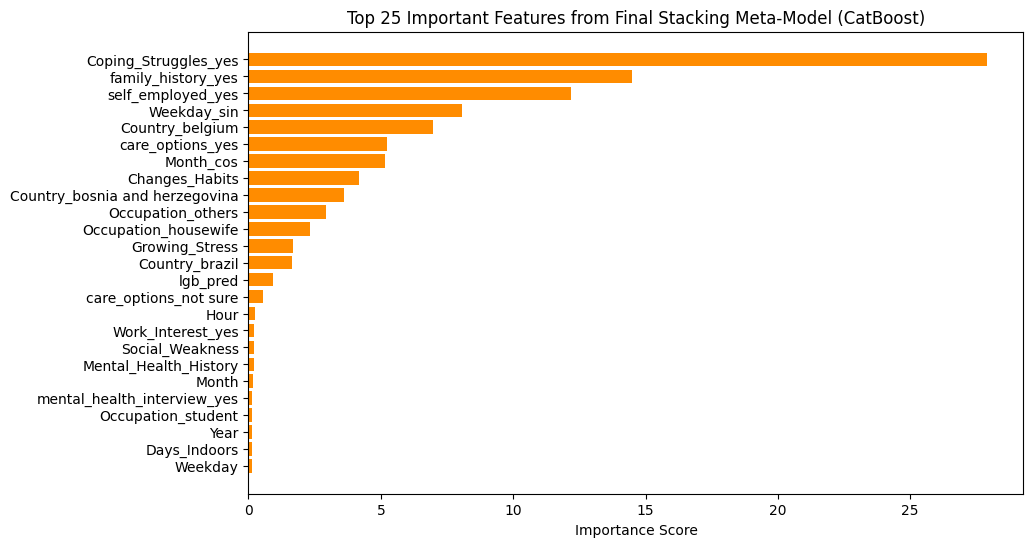

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Access final estimator (CatBoost)
final_model = stack_model_1.final_estimator_

# Get feature importances from CatBoost
importances = final_model.get_feature_importance()

# Include original features + meta-features (because passthrough=True)
feature_names = list(X_train_scaled.columns) + ['rf_pred','lgb_pred', 'cat_pred']

# Combine into DataFrame
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(25)

# Plot top 25 features
plt.figure(figsize=(10,6))
plt.barh(imp_df['Feature'], imp_df['Importance'], color='darkorange')
plt.gca().invert_yaxis()
plt.title("Top 25 Important Features from Final Stacking Meta-Model (CatBoost)")
plt.xlabel("Importance Score")
plt.show()


C:\Users\aarav\AppData\Local\Temp\ipykernel_1492\849439899.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(y='Feature', x='Normalized_Importance', data=imp_df, palette='viridis')


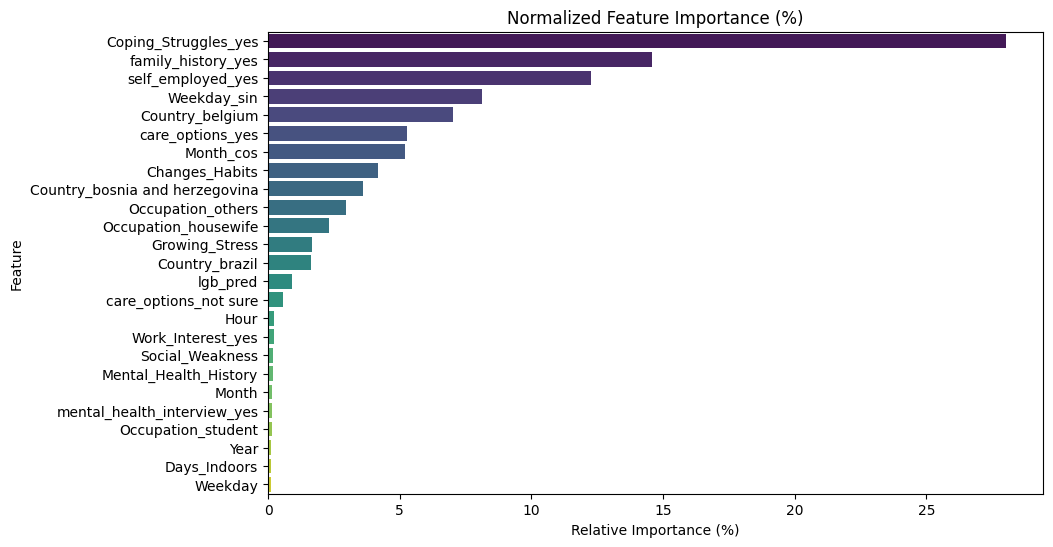

In [143]:
imp_df['Normalized_Importance'] = 100 * imp_df['Importance'] / imp_df['Importance'].sum()

plt.figure(figsize=(10,6))
sb.barplot(y='Feature', x='Normalized_Importance', data=imp_df, palette='viridis')
plt.title("Normalized Feature Importance (%)")
plt.xlabel("Relative Importance (%)")
plt.ylabel("Feature")
plt.show()


# FULL MODEL EVALUATION + COMPARISION CODE

🔹 Stack Model Evaluation Results 🔹
Accuracy: 0.9425
AUC-ROC: 0.9914

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     28774
           1       0.96      0.93      0.94     29237

    accuracy                           0.94     58011
   macro avg       0.94      0.94      0.94     58011
weighted avg       0.94      0.94      0.94     58011



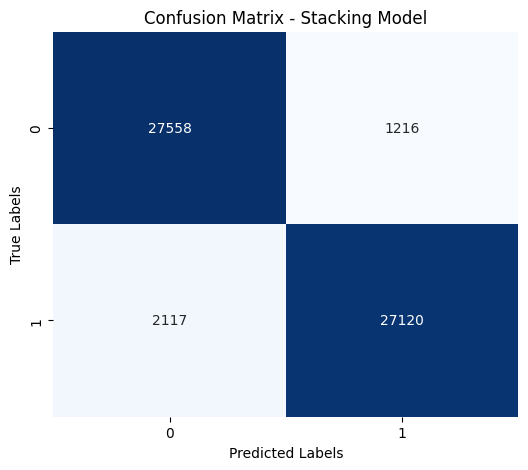

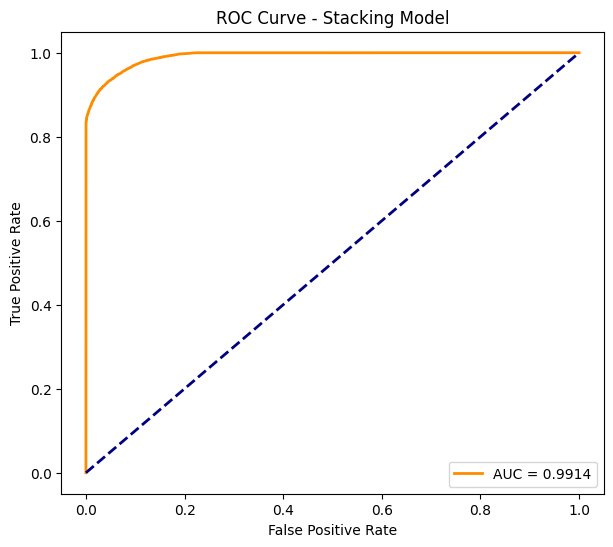

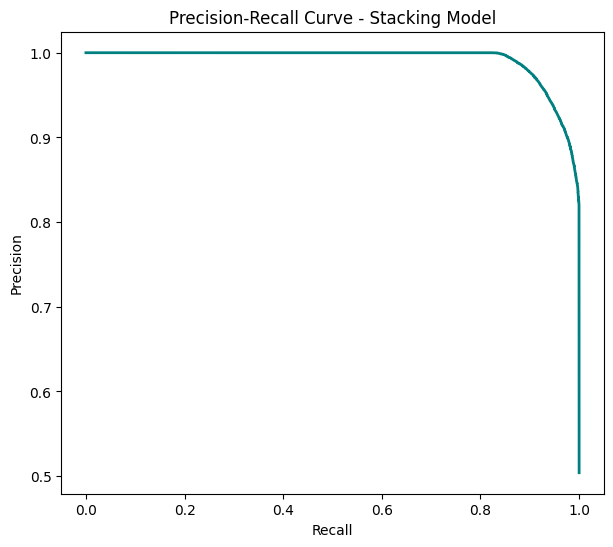

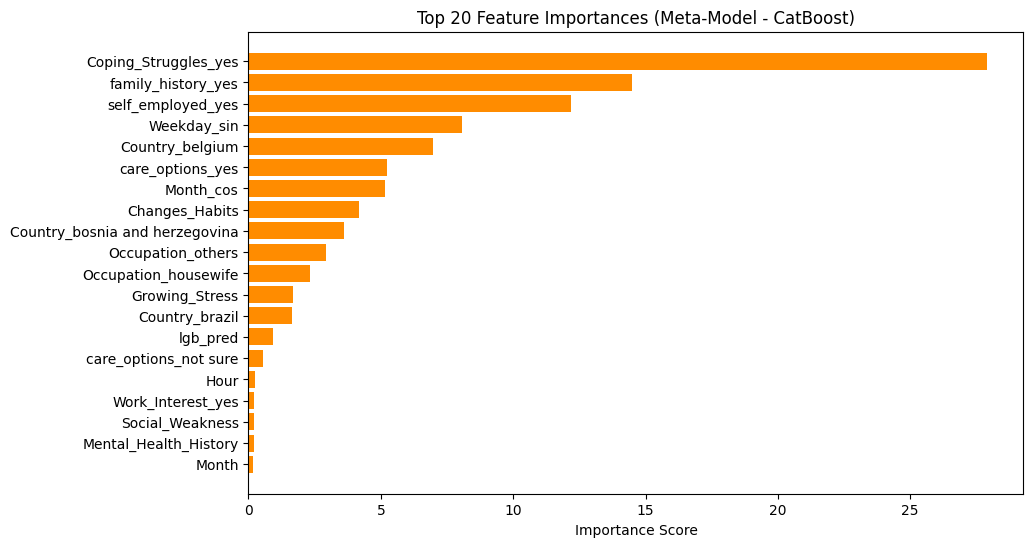

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)

# ✅ 1. Make Predictions
y_pred = stack_model_1.predict(X_test_scaled)
y_pred_proba = stack_model_1.predict_proba(X_test_scaled)[:, 1]

# ✅ 2. Basic Metrics
acc = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print("🔹 Stack Model Evaluation Results 🔹")
print(f"Accuracy: {acc:.4f}")
print(f"AUC-ROC: {auc_score:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ✅ 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Stacking Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ✅ 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Stacking Model")
plt.legend(loc="lower right")
plt.show()

# ✅ 5. Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(7, 6))
plt.plot(recall, precision, color='teal', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Stacking Model")
plt.show()

# ✅ 6. Feature Importance (from Final Meta-Model if CatBoost)
try:
    final_model = stack_model_1.final_estimator_
    importances = final_model.get_feature_importance()
    feature_names = list(X_train_scaled.columns) + ["rf_pred", "lgb_pred", "cat_pred"]

    imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
    imp_df = imp_df.sort_values(by="Importance", ascending=False).head(20)

    plt.figure(figsize=(10, 6))
    plt.barh(imp_df["Feature"], imp_df["Importance"], color="darkorange")
    plt.gca().invert_yaxis()
    plt.title("Top 20 Feature Importances (Meta-Model - CatBoost)")
    plt.xlabel("Importance Score")
    plt.show()
except Exception as e:
    print("Feature importance not available:", e)


# MODEL COMPARISION PLOT (ACCURACY AND AUC ROC ONLY)

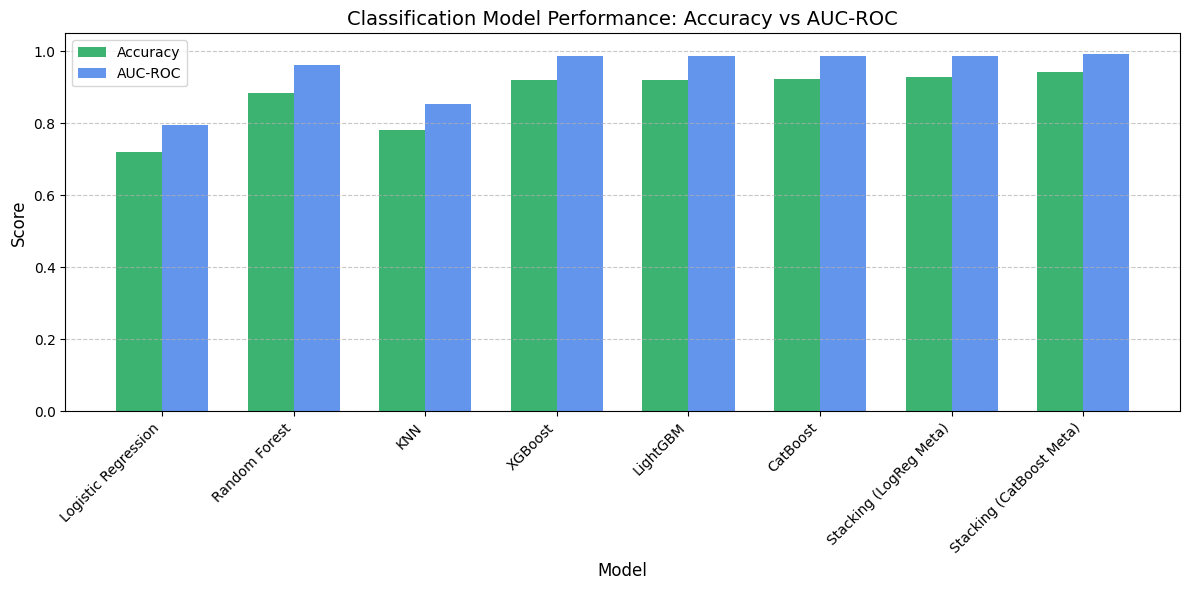

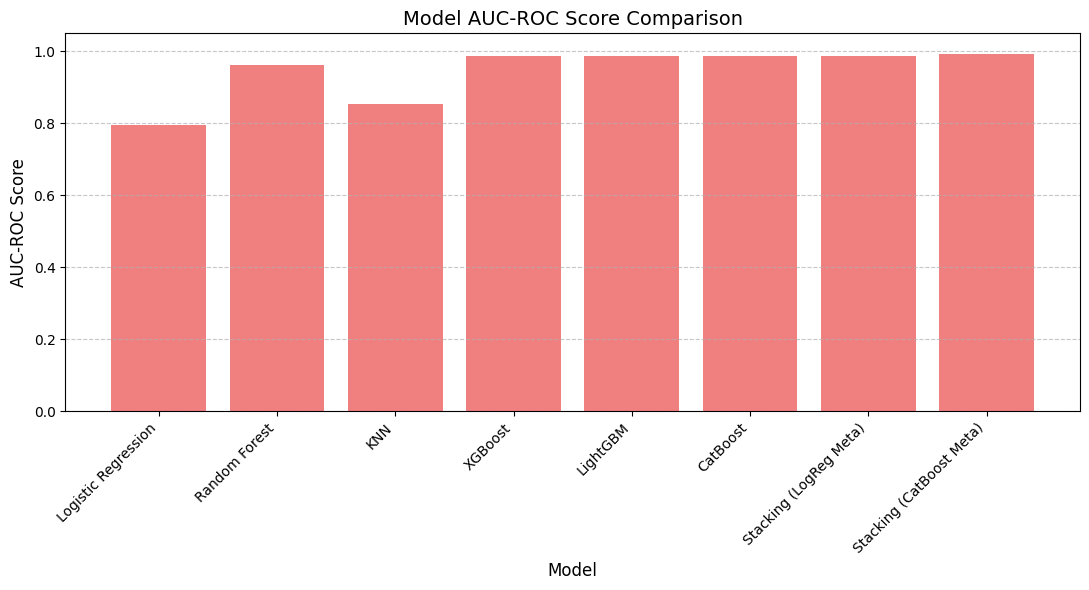

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    "Logistic Regression", "Random Forest",
    "KNN", "XGBoost", "LightGBM", "CatBoost",
    "Stacking (LogReg Meta)", "Stacking (CatBoost Meta)"
]

# Accuracy values
accuracy_scores = [
    0.7207, 0.8849,
    0.7809, 0.9211, 0.9212, 0.9218,
    0.9291, 0.9425
]

# AUC-ROC values
auc_scores = [
    0.7946, 0.9619,
    0.8538, 0.9859, 0.9863, 0.9863,
    0.9876, 0.9914
]

# --- Bar Plot: Accuracy vs AUC-ROC ---
x = np.arange(len(models))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, accuracy_scores, width=bar_width, label='Accuracy', color='mediumseagreen')
plt.bar(x + bar_width/2, auc_scores, width=bar_width, label='AUC-ROC', color='cornflowerblue')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Classification Model Performance: Accuracy vs AUC-ROC', fontsize=14)
plt.xticks(ticks=x, labels=models, rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Separate Bar Plot: AUC-ROC Only ---
plt.figure(figsize=(11, 6))
plt.bar(models, auc_scores, color='lightcoral')
plt.title('Model AUC-ROC Score Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('AUC-ROC Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# SAVING BEST MODEL FOR DEPLOYMENT

In [146]:
import joblib

# Save the trained model
joblib.dump(stack_model_1, "stack_model_1.pkl")

print("Model saved successfully as stack_model_1.pkl")


Model saved successfully as stack_model_1.pkl


# SAVING ENCODERS, SCALARS, MAPPING AND FINAL COLUMNS

In [147]:
# Save mood and days ordinal encoders
joblib.dump(mood_encoder, 'mood_encoder.pkl')
joblib.dump(days_encoder, 'days_encoder.pkl')

joblib.dump(binary_map, 'binary_map.pkl')
joblib.dump(preprocessor, 'column_transformer.pkl')
joblib.dump(scaler, 'scaler.pkl')
# Save the final columns after preprocessing
final_columns = X_train_scaled.columns.tolist()
joblib.dump(final_columns, 'final_columns.pkl')

['final_columns.pkl']

In [148]:
import pandas as pd
import numpy as np
import joblib
import pickle

# =========================
# Step 1: Load all saved components
# =========================
stack_model_1 = joblib.load("stack_model_1.pkl")
mood_encoder = joblib.load("mood_encoder.pkl")
days_encoder = joblib.load("days_encoder.pkl")
scaler = joblib.load("scaler.pkl")
final_columns = joblib.load("final_columns.pkl")

with open("binary_map.pkl", "rb") as f:
    binary_map = pickle.load(f)

# =========================
# Step 2: New input
# =========================
new_data = pd.DataFrame({
    'Gender': ['female'],
    'Country': ['united states	'],
    'Occupation': ['corporate'],
    'self_employed': ['no'],
    'family_history': ['no'],
    'Days_Indoors': ['1-14 days'],
    'Growing_Stress': ['yes'],
    'Changes_Habits': ['no'],
    'Mental_Health_History': ['yes'],
    'Mood_Swings': ['medium'],
    'Coping_Struggles': ['no'],
    'Work_Interest': ['no'],
    'Social_Weakness': ['yes'],
    'mental_health_interview': ['no'],
    'care_options': ['no'],
    'Year': [2014],
    'Month': [8],
    'Weekday': ['Wednesday'],
    'Hour': [11]
})

# =========================
# Step 3: Preprocessing
# =========================
# Cyclic encode time features
weekday_map = {"Monday":0,"Tuesday":1,"Wednesday":2,"Thursday":3,"Friday":4,"Saturday":5,"Sunday":6}
new_data['Weekday'] = new_data['Weekday'].map(weekday_map)
new_data['Month_sin'] = np.sin(2 * np.pi * new_data['Month']/12)
new_data['Month_cos'] = np.cos(2 * np.pi * new_data['Month']/12)
new_data['Weekday_sin'] = np.sin(2 * np.pi * new_data['Weekday']/7)
new_data['Weekday_cos'] = np.cos(2 * np.pi * new_data['Weekday']/7)

# Ordinal encoding
new_data['Mood_Swings'] = mood_encoder.transform(new_data[['Mood_Swings']])
new_data['Days_Indoors'] = days_encoder.transform(new_data[['Days_Indoors']])

# Binary mapping
binary_cols = ['Growing_Stress','Changes_Habits','Mental_Health_History','Social_Weakness']
for col in binary_cols:
    new_data[col] = new_data[col].map(binary_map)

# One-hot encoding for categorical columns manually
categorical_mappings = {
    'Gender': ['Gender_male'],
    'Country': [c for c in final_columns if c.startswith('Country_')],
    'Occupation': [c for c in final_columns if c.startswith('Occupation_')],
    'Work_Interest': ['Work_Interest_no','Work_Interest_yes'],
    'mental_health_interview': ['mental_health_interview_no','mental_health_interview_yes'],
    'self_employed': ['self_employed_yes'],
    'family_history': ['family_history_yes'],
    'Coping_Struggles': ['Coping_Struggles_yes'],
    'care_options': ['care_options_not sure','care_options_yes']
}

# Initialize all columns to 0
X_new = pd.DataFrame(0, index=[0], columns=final_columns)

# Fill appropriate columns
if new_data['Gender'][0]=='male':
    X_new['Gender_male'] = 1

X_new['Days_Indoors'] = new_data['Days_Indoors']
X_new['Growing_Stress'] = new_data['Growing_Stress']
X_new['Changes_Habits'] = new_data['Changes_Habits']
X_new['Mental_Health_History'] = new_data['Mental_Health_History']
X_new['Mood_Swings'] = new_data['Mood_Swings']
X_new['Social_Weakness'] = new_data['Social_Weakness']
X_new['Year'] = new_data['Year']
X_new['Month'] = new_data['Month']
X_new['Weekday'] = new_data['Weekday']
X_new['Hour'] = new_data['Hour']
X_new['Month_sin'] = new_data['Month_sin']
X_new['Month_cos'] = new_data['Month_cos']
X_new['Weekday_sin'] = new_data['Weekday_sin']
X_new['Weekday_cos'] = new_data['Weekday_cos']

# Set one-hot categorical columns
for col_group, col_list in categorical_mappings.items():
    val = new_data[col_group][0]
    col_name = f"{col_group}_{val.replace(' ','_')}"
    if col_name in X_new.columns:
        X_new[col_name] = 1

# =========================
# Step 4: Scaling
# =========================
X_scaled = pd.DataFrame(scaler.transform(X_new), columns=X_new.columns)

# =========================
# Step 5: Predict
# =========================
prediction = stack_model_1.predict(X_scaled)
predicted_label = 'Yes' if prediction[0]==1 else 'No'
print("🧠 Predicted Mental Health Treatment Requirement:", predicted_label)


🧠 Predicted Mental Health Treatment Requirement: No


In [149]:
import pandas as pd
import numpy as np
import joblib
import pickle

# =========================
# Step 1: Load all saved components
# =========================
stack_model_1 = joblib.load("stack_model_1.pkl")
mood_encoder = joblib.load("mood_encoder.pkl")
days_encoder = joblib.load("days_encoder.pkl")
scaler = joblib.load("scaler.pkl")
final_columns = joblib.load("final_columns.pkl")

with open("binary_map.pkl", "rb") as f:
    binary_map = pickle.load(f)

# =========================
# Step 2: New input
# =========================
new_data = pd.DataFrame({
    'Gender': ['female'],
    'Country': ['india'],
    'Occupation': ['student'],
    'self_employed': ['no'],
    'family_history': ['yes'],
    'Days_Indoors': ['15-30 days'],
    'Growing_Stress': ['yes'],
    'Changes_Habits': ['no'],
    'Mental_Health_History': ['yes'],
    'Mood_Swings': ['medium'],
    'Coping_Struggles': ['no'],
    'Work_Interest': ['no'],
    'Social_Weakness': ['yes'],
    'mental_health_interview': ['no'],
    'care_options': ['not sure'],
    'Year': [2014],
    'Month': [8],
    'Weekday': ['Friday'],
    'Hour': [12]
})

# =========================
# Step 3: Preprocessing
# =========================
# Cyclic encode time features
weekday_map = {"Monday":0,"Tuesday":1,"Wednesday":2,"Thursday":3,"Friday":4,"Saturday":5,"Sunday":6}
new_data['Weekday'] = new_data['Weekday'].map(weekday_map)
new_data['Month_sin'] = np.sin(2 * np.pi * new_data['Month']/12)
new_data['Month_cos'] = np.cos(2 * np.pi * new_data['Month']/12)
new_data['Weekday_sin'] = np.sin(2 * np.pi * new_data['Weekday']/7)
new_data['Weekday_cos'] = np.cos(2 * np.pi * new_data['Weekday']/7)

# Ordinal encoding
new_data['Mood_Swings'] = mood_encoder.transform(new_data[['Mood_Swings']])
new_data['Days_Indoors'] = days_encoder.transform(new_data[['Days_Indoors']])

# Binary mapping
binary_cols = ['Growing_Stress','Changes_Habits','Mental_Health_History','Social_Weakness']
for col in binary_cols:
    new_data[col] = new_data[col].map(binary_map)

# One-hot encoding for categorical columns manually
categorical_mappings = {
    'Gender': ['Gender_male'],
    'Country': [c for c in final_columns if c.startswith('Country_')],
    'Occupation': [c for c in final_columns if c.startswith('Occupation_')],
    'Work_Interest': ['Work_Interest_no','Work_Interest_yes'],
    'mental_health_interview': ['mental_health_interview_no','mental_health_interview_yes'],
    'self_employed': ['self_employed_yes'],
    'family_history': ['family_history_yes'],
    'Coping_Struggles': ['Coping_Struggles_yes'],
    'care_options': ['care_options_not sure','care_options_yes']
}

# Initialize all columns to 0
X_new = pd.DataFrame(0, index=[0], columns=final_columns)

# Fill appropriate columns
if new_data['Gender'][0]=='male':
    X_new['Gender_male'] = 1

X_new['Days_Indoors'] = new_data['Days_Indoors']
X_new['Growing_Stress'] = new_data['Growing_Stress']
X_new['Changes_Habits'] = new_data['Changes_Habits']
X_new['Mental_Health_History'] = new_data['Mental_Health_History']
X_new['Mood_Swings'] = new_data['Mood_Swings']
X_new['Social_Weakness'] = new_data['Social_Weakness']
X_new['Year'] = new_data['Year']
X_new['Month'] = new_data['Month']
X_new['Weekday'] = new_data['Weekday']
X_new['Hour'] = new_data['Hour']
X_new['Month_sin'] = new_data['Month_sin']
X_new['Month_cos'] = new_data['Month_cos']
X_new['Weekday_sin'] = new_data['Weekday_sin']
X_new['Weekday_cos'] = new_data['Weekday_cos']

# Set one-hot categorical columns
for col_group, col_list in categorical_mappings.items():
    val = new_data[col_group][0]
    col_name = f"{col_group}_{val.replace(' ','_')}"
    if col_name in X_new.columns:
        X_new[col_name] = 1

# =========================
# Step 4: Scaling
# =========================
X_scaled = pd.DataFrame(scaler.transform(X_new), columns=X_new.columns)

# =========================
# Step 5: Predict
# =========================
prediction = stack_model_1.predict(X_scaled)
predicted_label = 'Yes' if prediction[0]==1 else 'No'
print("🧠 Predicted Mental Health Treatment Requirement:", predicted_label)


🧠 Predicted Mental Health Treatment Requirement: Yes
